                                        # Dimensionality Reduction
                                          

# Required Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pylab
import statistics

# Load and display data

In [3]:
data = pd.read_csv("D:\\datasets\\Bone_Mineral_Density\\archive\\Bone_Mineral_density_data.csv")
data

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,0.894,-2.4,0.6895,-2.95,0.7130,...,1,1,0,1,1,1,0,No fracture,1,0
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0675,...,1,1,0,1,1,0,1,No fracture,0,0
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,0.5770,...,1,1,0,1,1,1,0,No fracture,0,0
3,1,64.7,158.0,59.0,23.634033,0.948,-2.3,0.7920,-2.15,0.9050,...,1,1,0,1,1,1,0,No fracture,1,1
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,0.9385,...,1,1,0,1,1,1,0,No fracture,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,2,51.0,160.0,59.0,23.046875,0.941,-2.0,0.7755,-2.30,0.9135,...,0,0,0,0,0,0,0,No fracture,1,1
1533,1,51.0,167.0,65.0,23.306680,1.048,-1.4,0.9755,-0.05,1.1630,...,0,1,0,0,0,1,0,No fracture,0,0
1534,1,46.6,168.0,69.0,24.447279,1.411,1.6,0.9450,-0.95,1.0750,...,0,1,0,0,0,0,0,No fracture,0,0
1535,1,55.0,175.0,70.0,22.857143,1.075,-1.2,1.0815,0.85,1.1705,...,0,0,0,0,0,0,0,No fracture,0,0


In [4]:
data.head()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,0.894,-2.4,0.6895,-2.95,0.7130,...,1,1,0,1,1,1,0,No fracture,1,0
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0675,...,1,1,0,1,1,0,1,No fracture,0,0
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,0.5770,...,1,1,0,1,1,1,0,No fracture,0,0
3,1,64.7,158.0,59.0,23.634033,0.948,-2.3,0.7920,-2.15,0.9050,...,1,1,0,1,1,1,0,No fracture,1,1
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,0.9385,...,1,1,0,1,1,1,0,No fracture,1,0


# Summarize the data

# Detecting the missing values

In [5]:
data.shape

(1537, 40)

In [6]:
#Finding the missing values

data.isnull().sum()

Gender              0
Age                36
Height             34
Weight             34
BMI                34
L1-4                0
L1.4T               0
FN                  0
FNT                 0
TL                  0
TLT                 0
ALT                 2
AST                 2
BUN                 1
CREA                3
URIC                0
FBG                16
HDL-C              17
LDL-C              14
Ca                  2
P                   5
Mg                  3
Calsium             0
Calcitriol          0
Bisphosphonate      0
Calcitonin          0
HTN                 0
COPD                0
DM                  0
Hyperlipidaemia     0
Hyperuricemia       0
AS                  0
VT                  0
VD                  0
OP                  0
CAD                 0
CKD                 0
Fracture            0
Smoking             0
Drinking            0
dtype: int64

# `To find whether it is Normally distributed`
#Calculating for Age

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

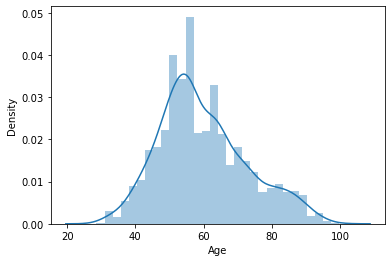

In [7]:
sns.distplot(data['Age'], bins=30)

In [8]:
# If it is not Normally distributed we use median(Md)

md_age = data['Age'].median()
md_age

57.0

In [9]:
# Replace the missing values with md

data['Age'] = data['Age'].fillna(md_age)

# Calculating for Height

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

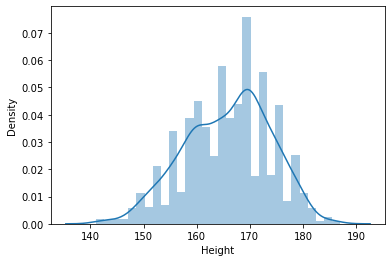

In [10]:
sns.distplot(data['Height'], bins=30)

In [11]:
md_height = data['Height'].median()
md_height

167.0

In [12]:
data['Height'] = data['Height'].fillna(md_height)

# Calculating for Weight

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

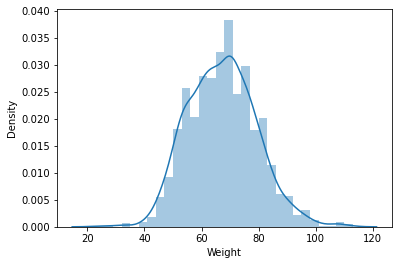

In [13]:
sns.distplot(data['Weight'], bins=30)

In [14]:
md_weight = data['Weight'].median()
md_weight

67.0

In [15]:
data['Weight'] = data['Weight'].fillna(md_weight)

# 
# Calculating for BMI

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

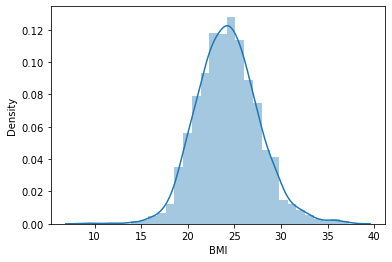

In [16]:
sns.distplot(data['BMI'], bins=30)

In [17]:
# It is Normally distributed so, we use mean

mean_bmi = data['BMI'].mean()
mean_bmi

24.312816944155053

In [18]:
# Replacing

data['BMI'] = data['BMI'].fillna(mean_bmi)

# Calculating for ALT

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ALT', ylabel='Density'>

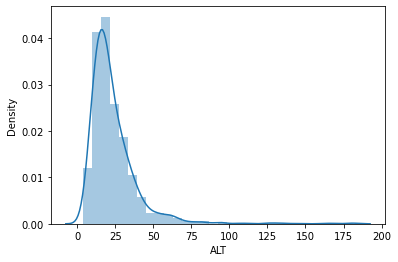

In [19]:
sns.distplot(data['ALT'], bins=30)

In [20]:
md_alt = data['ALT'].median()
md_alt

19.0

In [21]:
data['ALT'] = data['ALT'].fillna(md_alt)

# Calculating for AST

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AST', ylabel='Density'>

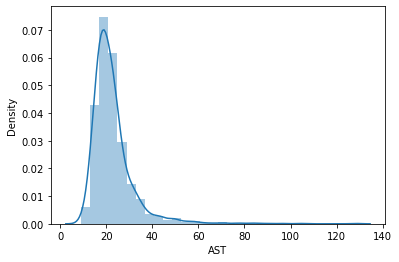

In [22]:
sns.distplot(data['AST'], bins=30)

In [23]:
md_ast = data['AST'].median()
md_ast

21.0

In [24]:
data['AST'] = data['AST'].fillna(md_ast)

# Calculating for BUN

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BUN', ylabel='Density'>

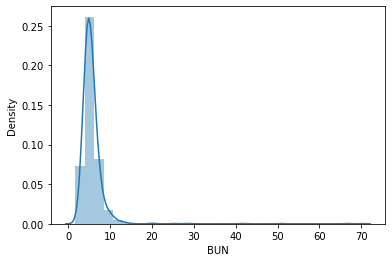

In [25]:
sns.distplot(data['BUN'], bins=30)

In [26]:
md_bun = data['BUN'].median()
md_bun

5.18

In [27]:
data['BUN'] = data['BUN'].fillna(md_bun)

# Calculating for CREA

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREA', ylabel='Density'>

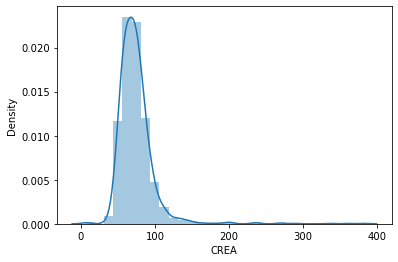

In [28]:
sns.distplot(data['CREA'], bins=30)

In [29]:
md_crea = data['CREA'].median()
md_crea

70.6

In [30]:
data['CREA'] = data['CREA'].fillna(md_crea)

# Calculating for HDL-C

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HDL-C', ylabel='Density'>

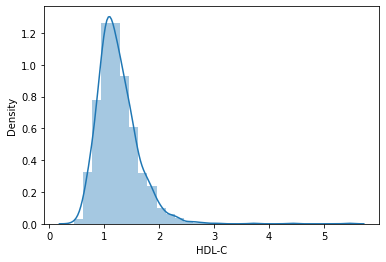

In [31]:
sns.distplot(data['HDL-C'], bins=30)

In [32]:
md_hdl = data['HDL-C'].median()
md_hdl

1.19

In [33]:
data['HDL-C'] = data['HDL-C'].fillna(md_hdl)

# Calculating for LDL-C

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDL-C', ylabel='Density'>

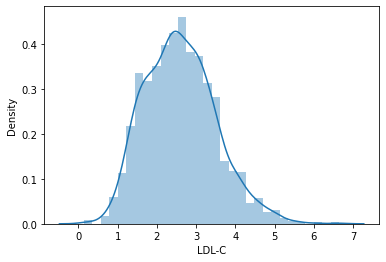

In [34]:
sns.distplot(data['LDL-C'], bins=30)

In [35]:
mean_ldl = data['LDL-C'].mean()
mean_ldl

2.5990216677610003

In [36]:
data['LDL-C'] = data['LDL-C'].fillna(mean_ldl)

# Calculating for Ca

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ca', ylabel='Density'>

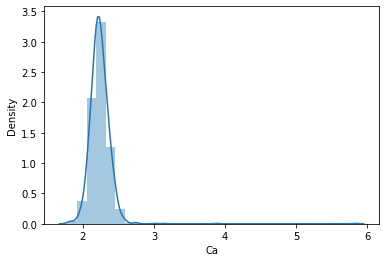

In [37]:
sns.distplot(data['Ca'], bins=30)

In [38]:
md_ca = data['Ca'].median()
md_ca

2.23

In [39]:
data['Ca'] = data['Ca'].fillna(md_ca)

# Calculating for FBG

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FBG', ylabel='Density'>

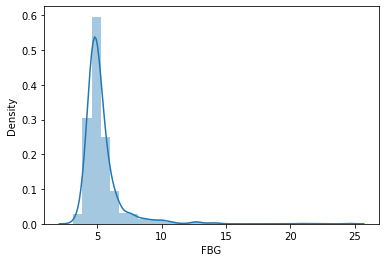

In [40]:
sns.distplot(data['FBG'], bins=30)

In [41]:
md_fbg = data['FBG'].median()
md_fbg

4.96

In [42]:
data['FBG'] = data['FBG'].fillna(md_fbg)

# Calculating for P

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P', ylabel='Density'>

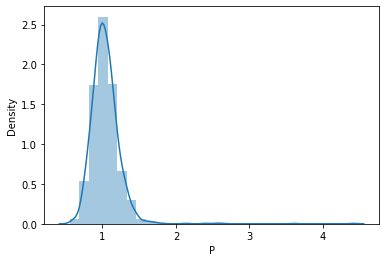

In [43]:
sns.distplot(data['P'], bins=30)

In [44]:
md_p = data['P'].median()
md_p

1.02

In [45]:
data['P'] = data['P'].fillna(md_p)

# Calculating for Mg

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mg', ylabel='Density'>

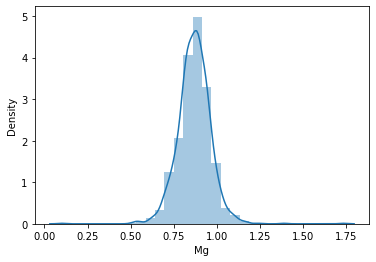

In [46]:
sns.distplot(data['Mg'], bins=30)

In [47]:
mean_mg = data['Mg'].mean()
mean_mg

0.868563885267277

In [48]:
data['Mg'] = data['Mg'].fillna(mean_mg)

# No missing values

In [49]:
data.isnull().sum()

Gender             0
Age                0
Height             0
Weight             0
BMI                0
L1-4               0
L1.4T              0
FN                 0
FNT                0
TL                 0
TLT                0
ALT                0
AST                0
BUN                0
CREA               0
URIC               0
FBG                0
HDL-C              0
LDL-C              0
Ca                 0
P                  0
Mg                 0
Calsium            0
Calcitriol         0
Bisphosphonate     0
Calcitonin         0
HTN                0
COPD               0
DM                 0
Hyperlipidaemia    0
Hyperuricemia      0
AS                 0
VT                 0
VD                 0
OP                 0
CAD                0
CKD                0
Fracture           0
Smoking            0
Drinking           0
dtype: int64

# Finding Outliers

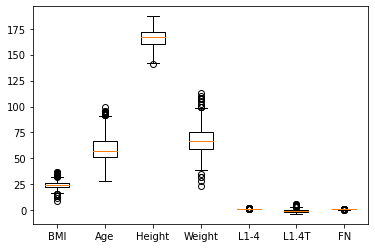

In [50]:

data1 = [data['BMI'], data['Age'], data['Height'], data['Weight'], data['L1-4'], data['L1.4T'], data['FN']]
plt.boxplot(data1, labels=['BMI','Age','Height','Weight','L1-4','L1.4T','FN'])
plt.show()

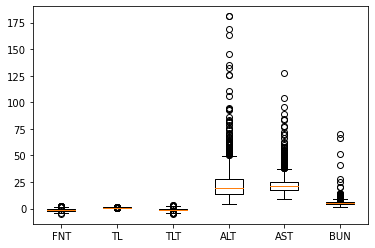

In [51]:

data2 = [data['FNT'], data['TL'], data['TLT'], data['ALT'], data['AST'], data['BUN']]
plt.boxplot(data2, labels=['FNT','TL','TLT','ALT','AST','BUN'])
plt.show()

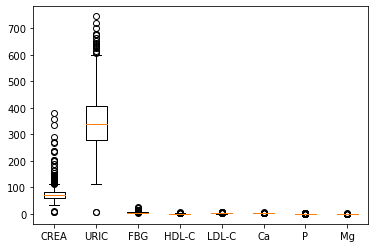

In [52]:

data3 = [data['CREA'], data['URIC'], data['FBG'], data['HDL-C'], data['LDL-C'], data['Ca'], data['P'], data['Mg']]
plt.boxplot(data3, labels=['CREA','URIC','FBG','HDL-C','LDL-C','Ca','P','Mg'])
plt.show()

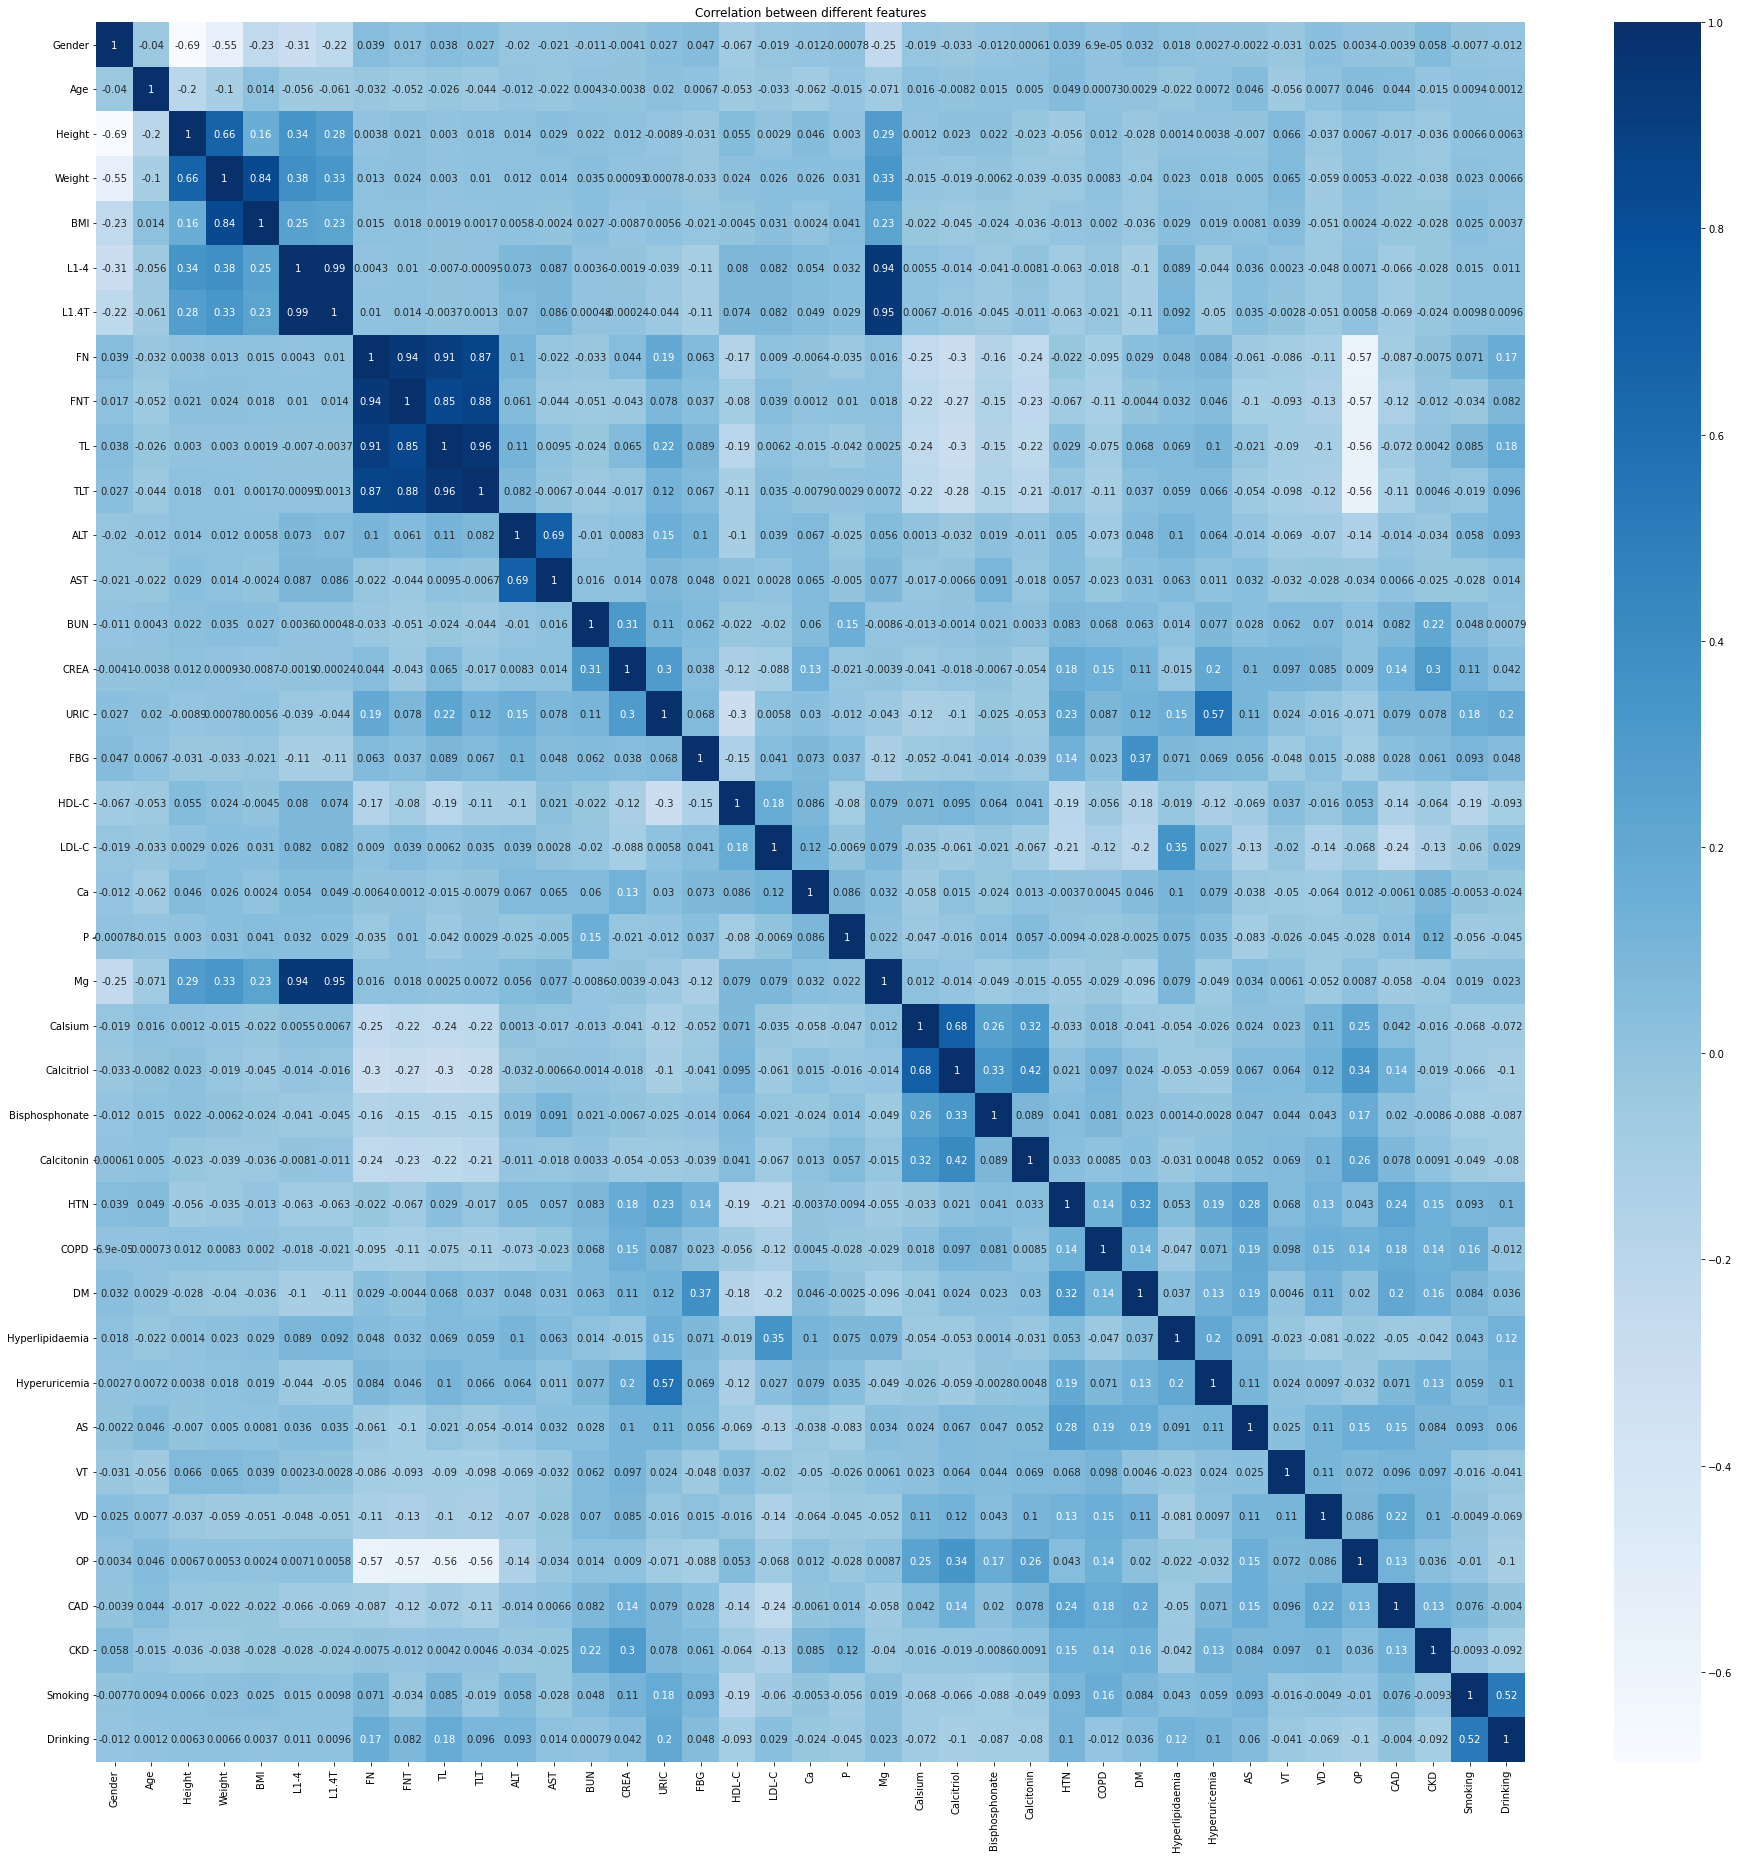

In [53]:
#Correlation

data_corr = data.corr()
plt.figure(figsize=(32,32))
sns.heatmap(data_corr, cmap="Blues", annot=True)
plt.title('Correlation between different features')
plt.show()

# Treating outliers using flooring and caping method

# Age

In [54]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['Age'])
Q1, Q3 = data["Age"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  91


In [55]:
data["Age"] = data["Age"].map(
    lambda x: 91 if x > 91 else x
)

# Treating both Upper & Lower limit

# BMI

In [56]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['BMI'])
Q1, Q3 = data["BMI"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  32
LCL =  16


In [57]:
data["BMI"] = data["BMI"].map(
    lambda x: 32 if x > 32 else x
)
data["BMI"] = data["BMI"].map(
    lambda x: 16 if x < 16 else x
)

# Height

In [58]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['Height'])
Q1, Q3 = data["Height"].quantile([0.25,0.75])
LCL = Q1 - 1.5 * (Q3 - Q1)
print("LCL = ", round(LCL))

LCL =  142


In [59]:
data["Height"] = data["Height"].map(
    lambda x: 142 if x < 142 else x
)

# weight

In [60]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['Weight'])
Q1, Q3 = data["Weight"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  99
LCL =  35


In [61]:
data["Weight"] = data["Weight"].map(
    lambda x: 99 if x > 99 else x
)
data["Weight"] = data["Weight"].map(
    lambda x: 35 if x < 35 else x
)

# L1-4

In [62]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['L1-4'])
Q1, Q3 = data["L1-4"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  2
LCL =  1


In [63]:
data["L1-4"] = data["L1-4"].map(
    lambda x: 1.6 if x > 1.6 else x
)
data["L1-4"] = data["L1-4"].map(
    lambda x: 1 if x < 1 else x
)

# L1.4T

In [64]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['L1.4T'])
Q1, Q3 = data["L1.4T"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  3


In [65]:
data["L1.4T"] = data["L1.4T"].map(
    lambda x: 3 if x > 3 else x
)

# FN

In [66]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['FN'])
Q1, Q3 = data["FN"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  1
LCL =  0


In [67]:
data["FN"] = data["FN"].map(
    lambda x: 1 if x > 1 else x
)
data["FN"] = data["FN"].map(
    lambda x: 0.5 if x < 0.5 else x
)

# FNT

In [68]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['FNT'])
Q1, Q3 = data["FNT"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  2
LCL =  -4


In [69]:
data["FNT"] = data["FNT"].map(
    lambda x: 1 if x > 1 else x
)
data["FNT"] = data["FNT"].map(
    lambda x: -4 if x < -4 else x
)

# TL

In [70]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['TL'])
Q1, Q3 = data["TL"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  1
LCL =  1


In [71]:
data["TL"] = data["TL"].map(
    lambda x: 1 if x > 1 else x
)
data["TL"] = data["TL"].map(
    lambda x: 1 if x < 1 else x
)

# TLT

In [72]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['TLT'])
Q1, Q3 = data["TLT"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  2
LCL =  -4


In [73]:
data["TLT"] = data["TLT"].map(
    lambda x: 2 if x > 2 else x
)
data["TLT"] = data["TLT"].map(
    lambda x: -3 if x < -3 else x
)

# ALT

In [74]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['ALT'])
Q1, Q3 = data["ALT"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  49


In [75]:
data["ALT"] = data["ALT"].map(
    lambda x: 49 if x > 49 else x
)

# AST

In [76]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['AST'])
Q1, Q3 = data["AST"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  37


In [77]:
data["AST"] = data["AST"].map(
    lambda x: 37 if x > 37 else x
)

# BUN

In [78]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['BUN'])
Q1, Q3 = data["BUN"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  9


In [79]:
data["BUN"] = data["BUN"].map(
    lambda x: 8 if x > 8 else x
)

# CREA

In [80]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['CREA'])
Q1, Q3 = data["CREA"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  114
LCL =  28


In [81]:
data["CREA"] = data["CREA"].map(
    lambda x: 113 if x > 113 else x
)
data["CREA"] = data["CREA"].map(
    lambda x: 28 if x < 28 else x
)

# URIC

In [82]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['URIC'])
Q1, Q3 = data["URIC"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  605
LCL =  82


In [83]:
data["URIC"] = data["URIC"].map(
    lambda x: 605 if x > 605 else x
)
data["URIC"] = data["URIC"].map(
    lambda x: 82 if x < 82 else x
)

# FBG

In [84]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['FBG'])
Q1, Q3 = data["FBG"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  7
LCL =  3


In [85]:
data["FBG"] = data["FBG"].map(
    lambda x: 6 if x > 6 else x
)
data["FBG"] = data["FBG"].map(
    lambda x: 4 if x < 4 else x
)

# HDL-C

In [86]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['HDL-C'])
Q1, Q3 = data["HDL-C"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  2


In [87]:
data["HDL-C"] = data["HDL-C"].map(
    lambda x: 2 if x > 2 else x
)


# LDL-C

In [88]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['LDL-C'])
Q1, Q3 = data["LDL-C"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  5


In [89]:
data["LDL-C"] = data["LDL-C"].map(
    lambda x: 5 if x > 5 else x
)

# Ca

In [90]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['Ca'])
Q1, Q3 = data["Ca"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  3
LCL =  2


In [91]:
data["Ca"] = data["Ca"].map(
    lambda x: 2 if x > 2 else x
)
data["Ca"] = data["Ca"].map(
    lambda x: 2 if x < 2 else x
)

# P

In [92]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['P'])
Q1, Q3 = data["P"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  1
LCL =  1


In [93]:
data["P"] = data["P"].map(
    lambda x: 1 if x > 1 else x
)
data["P"] = data["P"].map(
    lambda x: 1 if x < 1 else x
)

# Mg

In [94]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
# Driver code
sample_outliers = detect_outliers_iqr(data['Mg'])
Q1, Q3 = data["Mg"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))
print("LCL = ", round(LCL))

UCL =  1
LCL =  1


In [95]:
data["Mg"] = data["Mg"].map(
    lambda x: 1 if x > 1 else x
)
data["Mg"] = data["Mg"].map(
    lambda x: 1 if x < 1 else x
)

# Box Plot

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


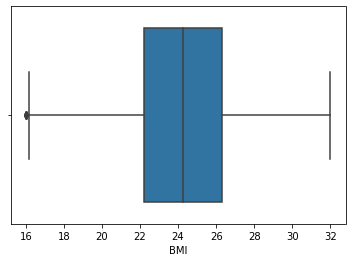

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


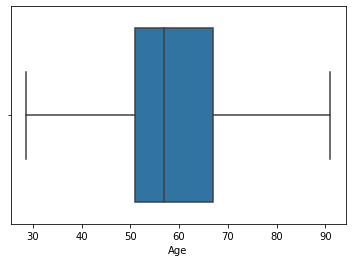

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


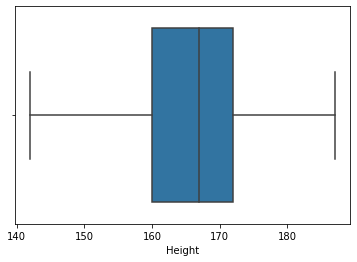

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


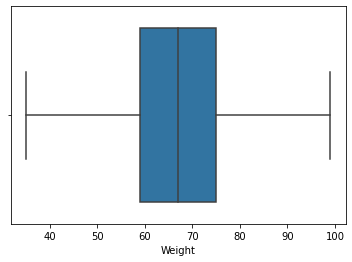

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


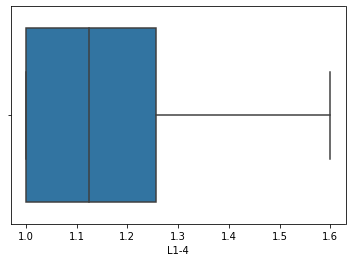

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


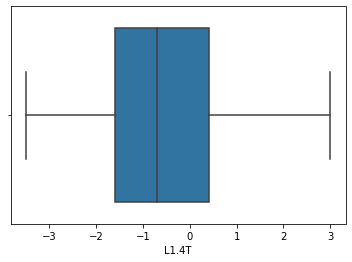

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


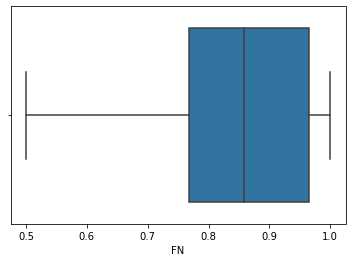

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


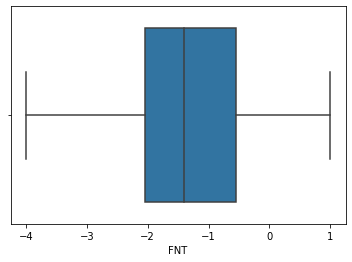

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


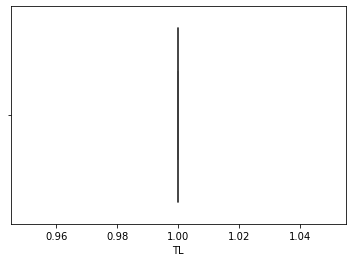

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


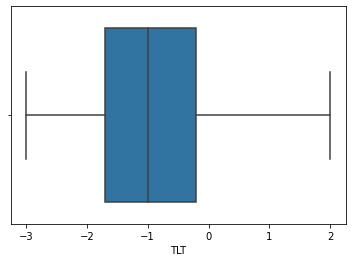

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


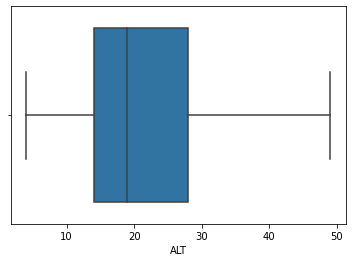

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


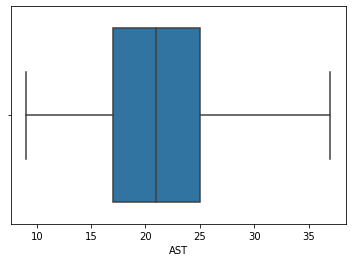

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


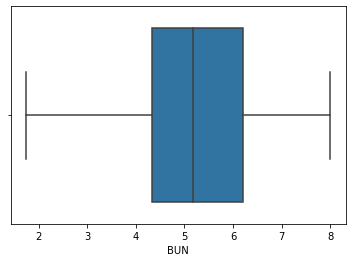

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


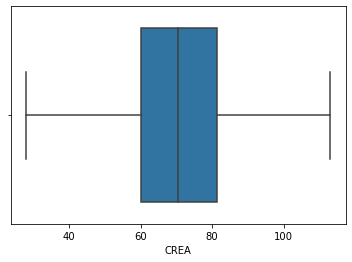

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


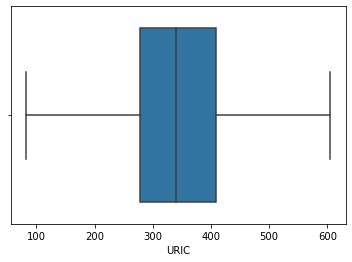

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


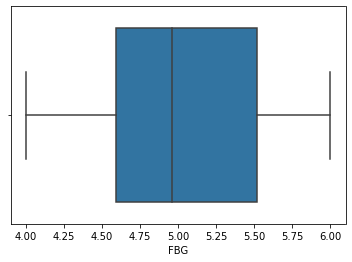

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


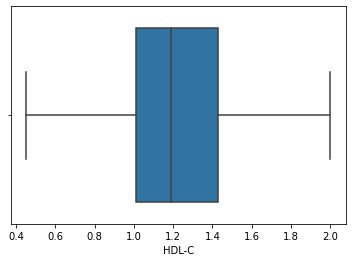

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


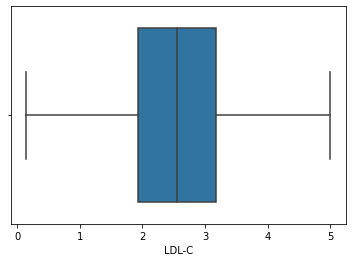

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


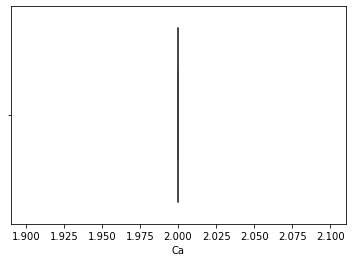

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


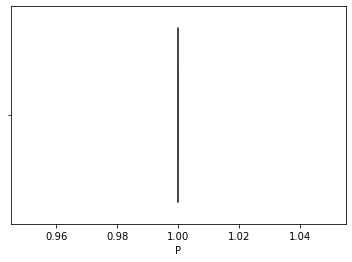

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


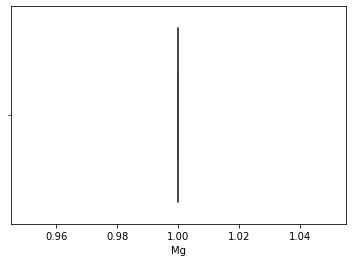

In [96]:
sns.boxplot(data['BMI'])
plt.show()

sns.boxplot(data['Age'])
plt.show()

sns.boxplot(data['Height'])
plt.show()

sns.boxplot(data['Weight'])
plt.show()

sns.boxplot(data['L1-4'])
plt.show()

sns.boxplot(data['L1.4T'])
plt.show()

sns.boxplot(data['FN'])
plt.show()

sns.boxplot(data['FNT'])
plt.show()

sns.boxplot(data['TL'])
plt.show()

sns.boxplot(data['TLT'])
plt.show()

sns.boxplot(data['ALT'])
plt.show()

sns.boxplot(data['AST'])
plt.show()

sns.boxplot(data['BUN'])
plt.show()

sns.boxplot(data['CREA'])
plt.show()

sns.boxplot(data['URIC'])
plt.show()

sns.boxplot(data['FBG'])
plt.show()

sns.boxplot(data['HDL-C'])
plt.show()

sns.boxplot(data['LDL-C'])
plt.show()

sns.boxplot(data['Ca'])
plt.show()

sns.boxplot(data['P'])
plt.show()

sns.boxplot(data['Mg'])
plt.show()

# Finding how many of them got fractured

In [97]:
#check the class is balance

data['Fracture'].value_counts()

No fracture    1506
fracture         31
Name: Fracture, dtype: int64

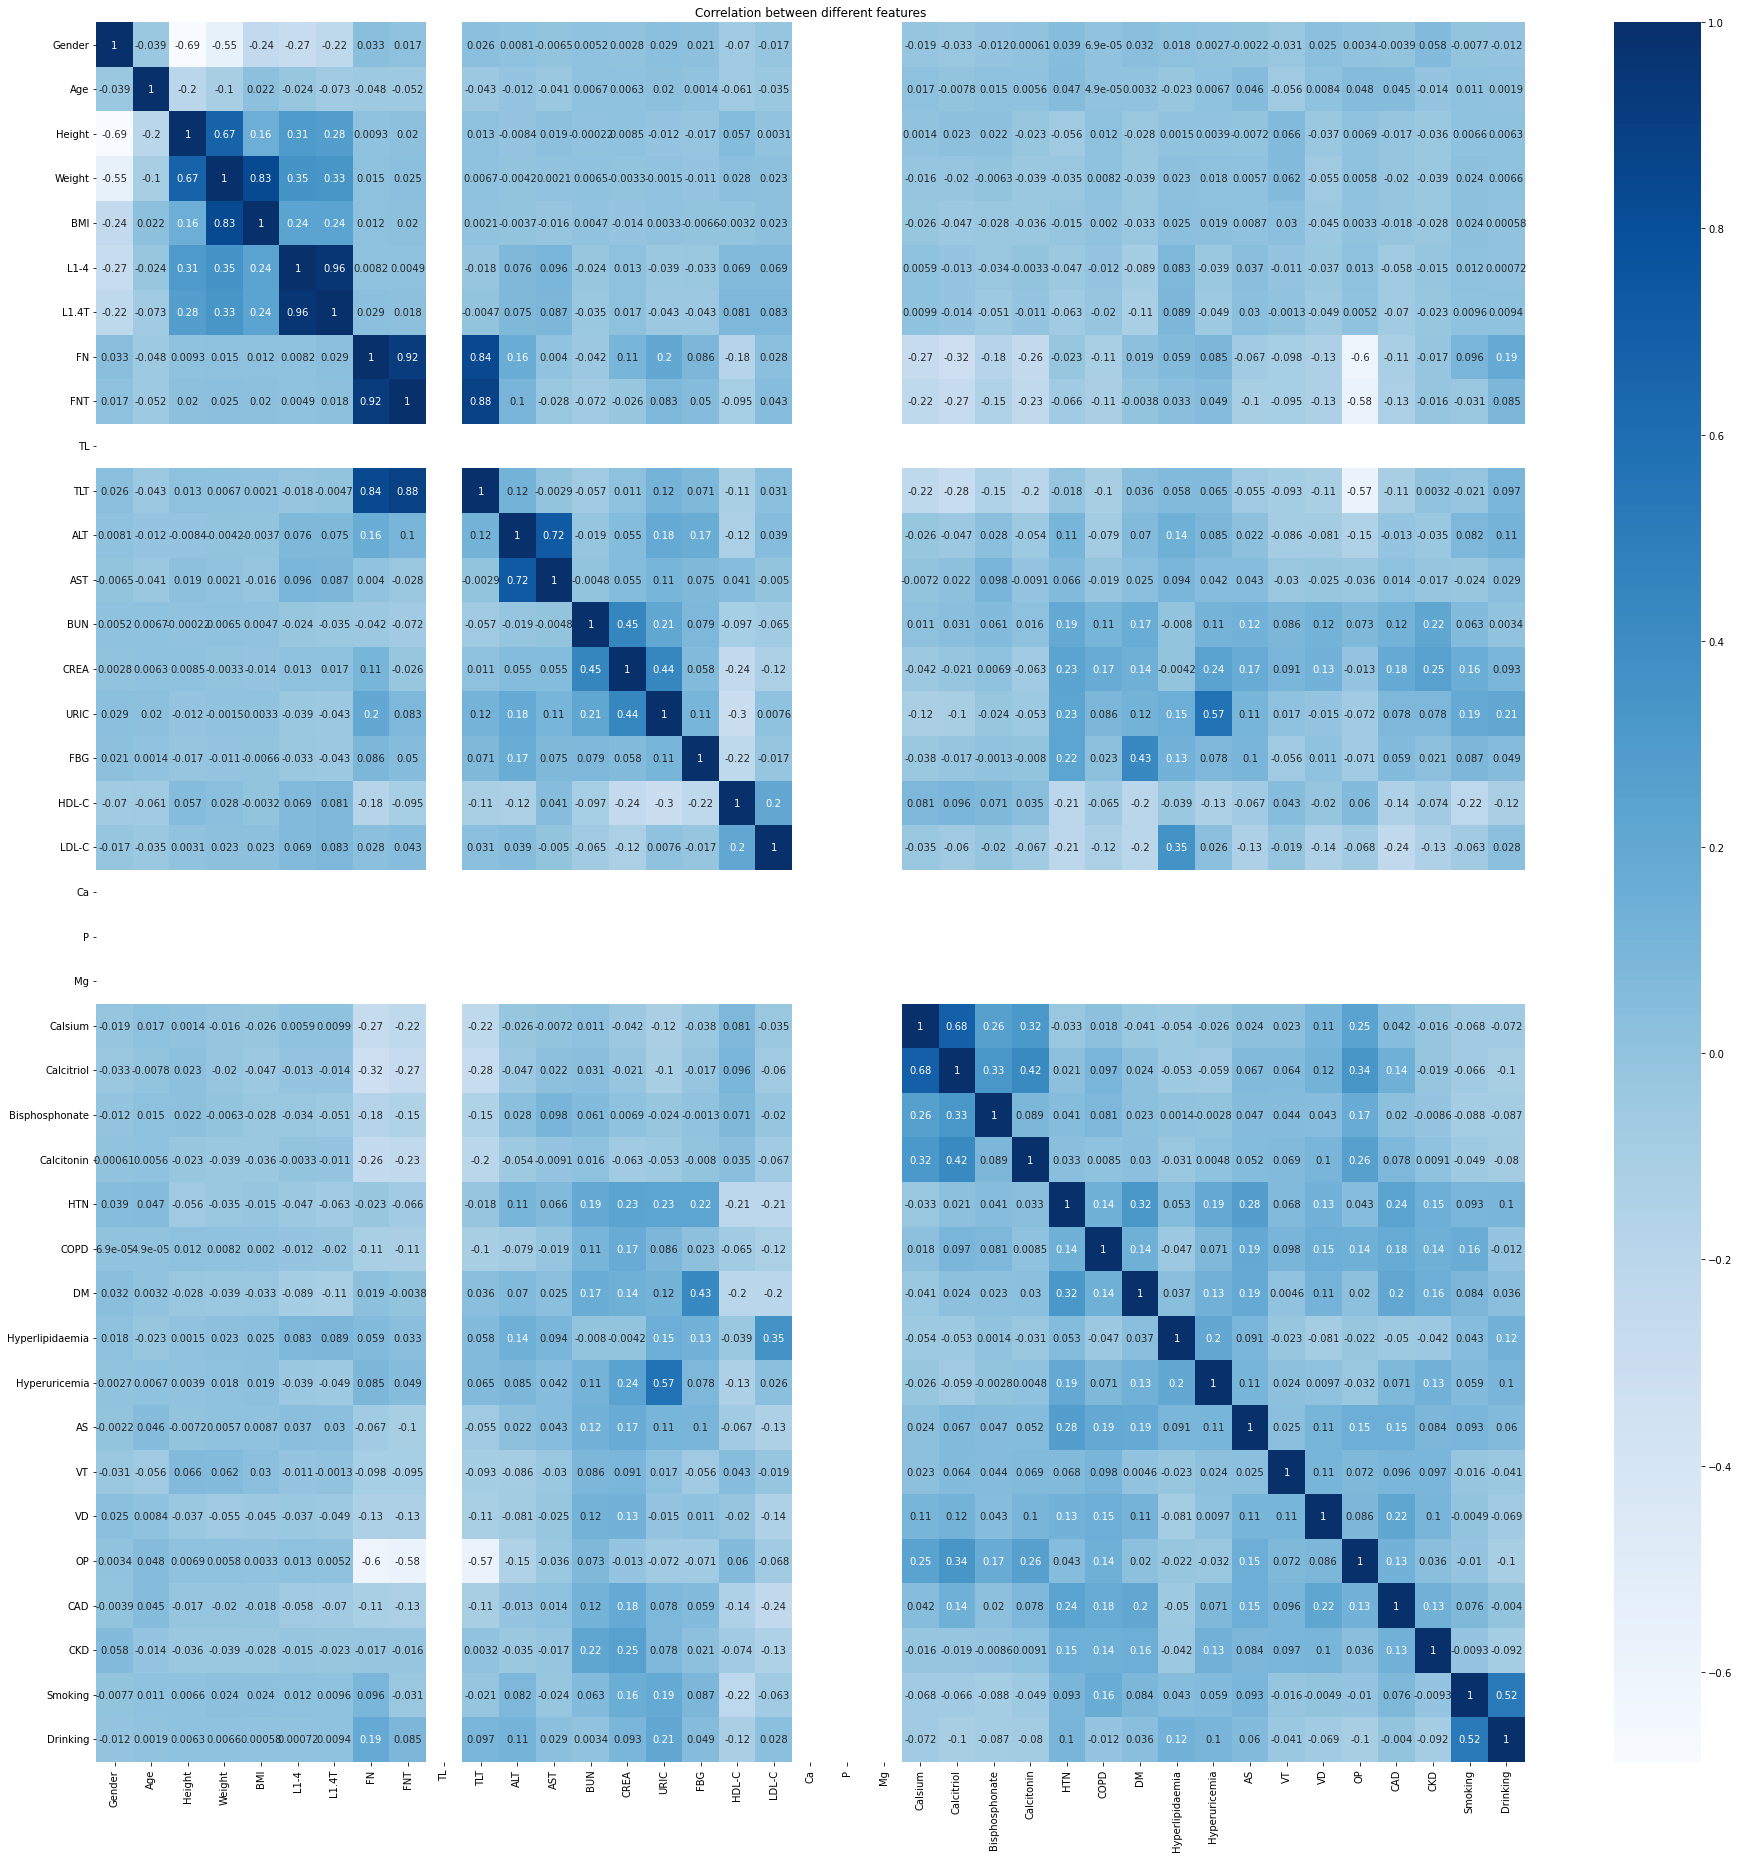

In [98]:
#Correlation

data_corr = data.corr()
plt.figure(figsize=(32,32))
sns.heatmap(data_corr, cmap="Blues", annot=True)
plt.title('Correlation between different features')
plt.show()

In [116]:
# Scaling
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [100]:
scale = StandardScaler()

X = data[['Gender','Age','Height','Weight','BMI','L1-4','L1.4T','FN','FNT','TL','TLT','ALT','AST','BUN','CREA','URIC','FBG','HDL-C','LDL-C','Ca','P','Mg','Calsium','Calcitriol','Bisphosphonate','Calcitonin','HTN','COPD','DM','Hyperlipidaemia','Hyperuricemia','AS','VT','VD','OP','CAD','CKD','Smoking','Drinking']]
scaledX = scale.fit_transform(X)
print(scaledX)

[[ 1.26344125  0.16876137 -0.23108742 ... -0.19979692  1.69744312
  -0.54301104]
 [ 1.26344125 -0.37406867 -0.48125918 ...  5.00508216 -0.58912136
  -0.54301104]
 [ 1.26344125 -1.23944989 -0.73143094 ... -0.19979692 -0.58912136
  -0.54301104]
 ...
 [-0.79148912 -1.03490523  0.26925611 ... -0.19979692 -0.58912136
  -0.54301104]
 [-0.79148912 -0.37406867  1.14485727 ... -0.19979692 -0.58912136
  -0.54301104]
 [-0.79148912 -1.16077887  0.76959963 ... -0.19979692 -0.58912136
  -0.54301104]]


In [101]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [103]:
features = ['L1-4','L1.4T','BMI','FN','FNT','TL','TLT','ALT','AST','BUN','CREA','URIC','FBG','HDL-C','LDL-C','Ca','P','Mg','Calsium','Calcitriol','Bisphosphonate','Calcitonin','HTN','COPD','DM']

x = data.loc[:, features].values

y = data.loc[:, ['Fracture']].values

x = StandardScaler().fit_transform(x)

In [104]:
#PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [105]:
principalDataframe.tail()

,PC1,PC2
1532,0.431013,-0.031619
1533,-2.208577,-1.148309
1534,-1.621035,-0.526216
1535,-1.892790,-3.127699
1536,-0.397065,-0.996459


In [106]:
targetDataframe = data[['Fracture']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [107]:
newDataframe

,PC1,PC2,Fracture
0,3.876474,2.150747,No fracture
1,-0.481710,1.218375,No fracture
2,5.765641,2.267338,No fracture
3,1.102212,4.570397,No fracture
4,1.454264,1.461880,No fracture
...,...,...,...
1532,0.431013,-0.031619,No fracture
1533,-2.208577,-1.148309,No fracture
1534,-1.621035,-0.526216,No fracture
1535,-1.892790,-3.127699,No fracture


In [108]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
percent_variance

array([16.48, 12.28])

Text(0, 0.5, 'PC2')

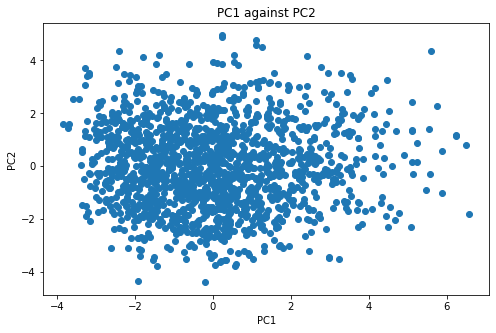

In [109]:
plt.figure(figsize=(8, 5))
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

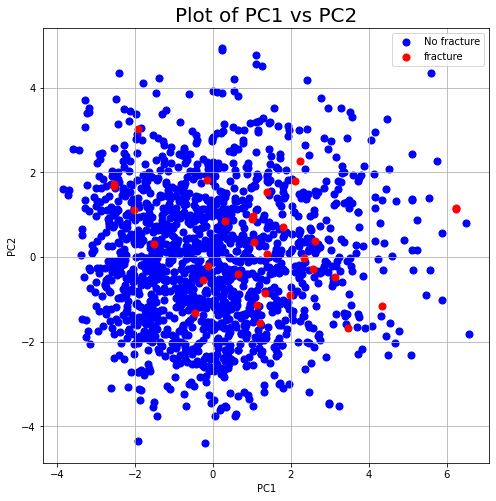

In [110]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['No fracture','fracture']

colors = ['b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['Fracture'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [111]:
pca.explained_variance_ratio_

array([0.16475559, 0.12275407])

In [112]:
# In this dataset we cant do pca so we need to do lda!

In [ ]:
#LDA

In [127]:
data.head()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,1.000,-2.4,0.6895,-2.95,1.0,...,1,1,0,1,1,1,0,No fracture,1,0
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0,...,1,1,0,1,1,0,1,No fracture,0,0
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,1.0,...,1,1,0,1,1,1,0,No fracture,0,0
3,1,64.7,158.0,59.0,23.634033,1.000,-2.3,0.7920,-2.15,1.0,...,1,1,0,1,1,1,0,No fracture,1,1
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,1.0,...,1,1,0,1,1,1,0,No fracture,1,0


In [128]:
X = data.iloc[:, 1:].values
Y = data['Smoking'].values

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
X_scaled=scaler.transform(data)

ValueError: could not convert string to float: 'No fracture'

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'No fracture'